<a href="https://colab.research.google.com/github/annacfisher/project_gss/blob/main/group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1

## Machine Learning 1

Group 8: Semin Ahn (mkb8ku), Anna Fisher (gjf2sm), Emily Fredenburgh (xux5ev), Ashley Rommel (zwu6su)

# Summary

For this project, our group decided to explore how the interactions of age, marital status, happiness, and income influence individuals' beliefs in life after death. Various methods were used to determine those variables’ effects on individuals’ beliefs in life after death. First, we cleaned each variable in order to perform data analysis and figure out the relationship between variables. Then, we cross tabulated the post-life variable with all the other variables (marital status, happiness, and income) to check null values for each of those variables and post-life variables. As a result, we saw that most people responded to the marriage question while fewer responded to the post-life question. For happiness levels, a lot more people answered the post-life question. For income level, people who answered the income question also answered the post-life question; there is not some set of the population that does not answer the post-life question. Then, we looked at the interactions between each of these variables and post-life variables. Based on the histogram created with income and post-life variables, we could conclude that individuals who have higher income believe more in post-life. Also, based on the kernel density plot, one of the highest income levels, $25,000, shows the greatest difference in yes and no to belief in post-life. When performing analysis with all four variables grouped by income, marital status, happiness, and postlife, people who showed the highest mean are people who are very happy, married, and who believe in life after death. Based on the grouped description between postlife/age and postlife/income, the result shows that there is no significant difference in belief based on age. However, overall income is larger for those who believe in post-life than for those who do not. We also explored the relationship between the income and happiness variables, and the result shows that there is a positive correlation between those two variables. Therefore, various analyses our group performed for this project shows how each of these variables interact with each other.

## Data

As we navigated the massive dataset of the General Social Survey (GSS), the variable that stuck out to us most was whether or not respondents believed in life after death, as well as how age, income, perceived happiness, and marital status may impact one's belief in a postlife. The idea of different aspects of one's life impacting their belief in a postlife was fascinating to us, and we felt compelled to use that variable as the basis for our project. In choosing the other variables, we felt they fit together nicely around the different aspects of a person's life (financial security or lack thereof, love life, stage of life, and mental wellbeing).

We began reading the data by making a .csv file from the GSS data that only contained the variables we were interested in, then viewed the head of the dataset to confirm that the variables were selected correctly.

Cleaning the data provided unique challenges for each variable, mainly accounting for missing values and coercion of entries to not a number (NaN). It is important to clean data because it results in less errors, inconsistencies, and outliers when performing an analysis, creating more reliable results.

The variable 'income' was contained in buckets that symbolized a range of values. To make the analysis simpler, the values for 'income' were rounded up to the highest bound of each bucket, then coerced to numeric values, and were no longer strings. Additionally, 'income' had a few missing values that were inputted as either 'nan' (in string format) or simply 'income'. These responses were coerced to NaNs. The buckets of data for 'income' were oddly measured, as the highest bracket was 25,000 dollars or above. This is not indicative of the median income in the United States, which is significantly higher. Very few employed people in the United States earn between 1,000 and 25,000 as their yearly income. Despite this, the majority of responses were above 25,000 dollars, with about 35,000 respondents saying they made above 25,000.

The variable 'age' only required coercing the values to numeric instead of strings, and there were not missing values to account for.

'happy' was an odd variable to clean, as the answers were subjective and categorical. The answer choices were 'happy', 'not too happy', 'pretty happy', and 'very happy'. However, because only 2 respondents answered 'happy', those 2 values were coerced to not a number (NaN). For ease of making graphs, 'not too happy', 'very happy', and 'pretty happy' were coerced to numeric values. 'not too happy' was coerced to a numeric value of 0; 'very happy' was coerced to 10; 'pretty happy' was coerced to 5.

'postlife' had many missing/blank entries that were coerced to NaNs, and the entries of 'nan' and 'postlife' also had to be coerced to NaNs. This left the only opens to answering 'postlife' as yes or no.

Cleaning 'marital' (marital status) was straightforward, and only required coercing the response of 'marital' to NaN. After that, married, never married, divorced, widowed, or separated were the only outcomes to the question.

After all of the variables were cleaned by standardizing the values and removing missing entries, the variables were prepared for analysis. The only challenges were in regards to finding variables of interest from that massive dataset, and then ensuring there were no missing values that would skew the ease of analysis. Coercing variable entries from strings to numeric values was not a challenge, but it made analysis via scatterplots and histograms simpler. Additionally, converting 'income' from strings that referred to a range of values to one value representative of that range allowed for easier visualization. Similarly, coercing the answers for 'happy' to 0, 5, and 10 provided a similar benefit.

Overall, this data did not present many difficulties in preparation for analysis.

### Loading GSS dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! git clone https://github.com/annacfisher/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 101 (delta 39), reused 16 (delta 16), pack-reused 56
Receiving objects: 100% (101/101), 25.13 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (10/10), done.


In [ ]:
df = pd.read_csv('/content/project_gss/selected_gss_data.csv')

In [ ]:
df.head()

,marital,postlife,age,happy,income
0,never married,NaN,23.0,not too happy,NaN
1,married,NaN,70.0,not too happy,NaN
2,married,NaN,48.0,pretty happy,NaN
3,married,NaN,27.0,not too happy,NaN
4,married,NaN,61.0,pretty happy,NaN


In [ ]:
df.value_counts()

marital  postlife  age   happy          income            
married  yes       43.0  pretty happy   $25,000 or more       186
                   36.0  pretty happy   $25,000 or more       176
                   35.0  pretty happy   $25,000 or more       175
                   37.0  pretty happy   $25,000 or more       172
                   40.0  pretty happy   $25,000 or more       161
                                                             ... 
                   68.0  not too happy  $15,000 to $19,999      1
                   67.0  very happy     $7,000 to $7,999        1
                                        $5,000 to $5,999        1
                         pretty happy   $3,000 to $3,999        1
widowed  yes       89.0  very happy     under $1,000            1
Length: 8716, dtype: int64

### Cleaning 'marital', 'postlife', 'age', 'happy', and 'income' variables

In [ ]:
#cleaning age and happiness level

In [ ]:
print(df.dtypes, '\n') #printing the data type of each variable

marital     object
postlife    object
age         object
happy       object
income      object
dtype: object 



In [ ]:
df['age'].describe() # showing the description for age variable

count     71623
unique       73
top        30.0
freq       1571
Name: age, dtype: object

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce') # coercing age variable from numeric from object data type
df['age'].describe() # showed description of age variable to see what happened after coercing it to numeric
#after - only losing 2 data points


count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

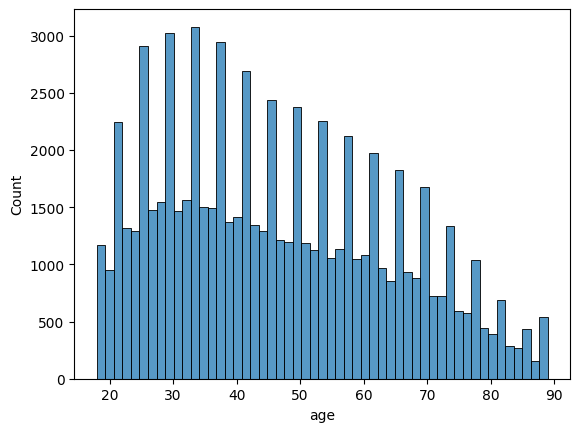

In [ ]:
sns.histplot(df['age']) # creating histogram for age variable

In [ ]:
df['happy'].value_counts() # displaying the counts for each unique value for happy variable to see what to clean

#df['happy'].describe() #not all age observations have a happiness observation

pretty happy     37813
very happy       20385
not too happy     9390
happy                2
Name: happy, dtype: int64

In [ ]:
#only 2 people answered happy, and it's unclear where happy is in the rankings, so replace those values with NAN

In [ ]:
df['happy'] = df['happy'].replace( 'happy', np.nan) # making 'happy' response to be NaN

In [ ]:
#making a numeric representation of happy for plots - 0=not happy, 1=pretty happy, 2=very happy

df['happy_numeric']=df["happy"]

In [ ]:
df["happy_numeric"]=df['happy_numeric'].replace("not too happy",0)

In [ ]:
df["happy_numeric"]=df['happy_numeric'].replace("pretty happy",5)
df["happy_numeric"]=df['happy_numeric'].replace("very happy",10)

<Axes: >

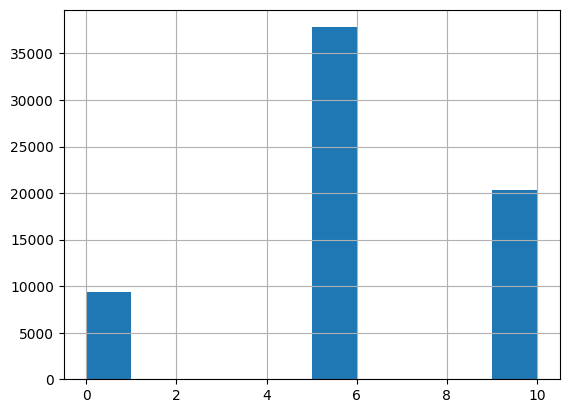

In [ ]:
df['happy_numeric'].hist() # creating a histogram for numeric happy variable

<Axes: >

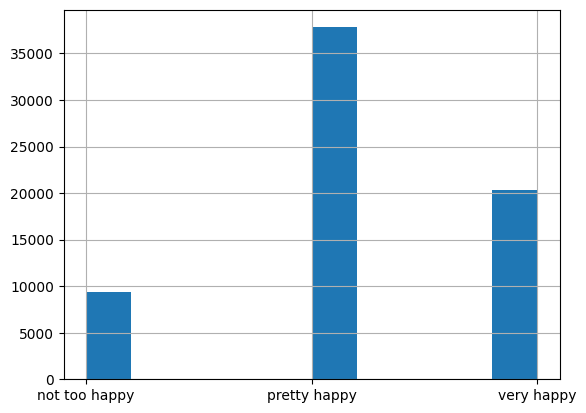

In [ ]:
df["happy"].hist() # creating histogram for happy varible to see if it matches the numeric happy variable


In [ ]:
# cleaning postlife variable

In [ ]:
var = 'postlife'
print(df [var].unique(), '\n') # showing unique values for postlife variable

[nan 'yes' 'no' 'postlife'] 



In [ ]:
df[var] = df[var].replace(' ',np.nan) # replace blank to np.nan
print (df[var].value_counts(), '\n') # displaying counts for each unique value in postlife variable to see what else to clean

yes         35337
no           8811
postlife        2
Name: postlife, dtype: int64 



In [ ]:
# drop the "postlife" answer - assume typo or nonanswer
df[var] = df[var].replace('postlife',np.nan)

<Axes: >

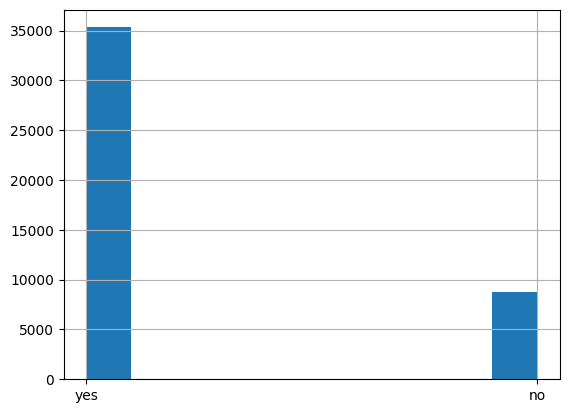

In [ ]:
df['postlife'].hist() # creating histogram of postlife variable

In [ ]:
# cleaning marital status variable

In [ ]:
var = 'marital'
print(df [var].unique(), '\n') # showing unique values for marital variable
print (df[var].value_counts(), '\n') # showing counts for each unique value in marital variable

['never married' 'married' 'divorced' 'widowed' 'separated' nan 'marital'] 

married          37590
never married    15910
divorced          9642
widowed           6756
separated         2441
marital              2
Name: marital, dtype: int64 



In [ ]:
df[var] = df[var].replace('marital',np.nan) # replace marital to np.nan because there are only two in that variable
print (df[var].value_counts(), '\n') # showing counts for each unique value in marital variable to check that I made the marital value nan

married          37590
never married    15910
divorced          9642
widowed           6756
separated         2441
Name: marital, dtype: int64 



<Axes: >

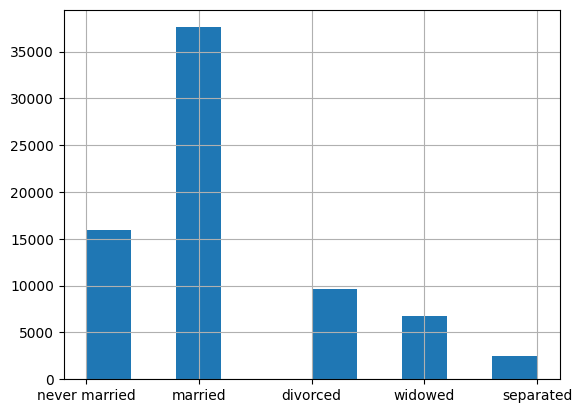

In [ ]:
df['marital'].hist() # making a histogram for marital status variable

In [ ]:
# cleaning income
income = df['income']
income.unique() # showing unique values for income variable
# because they're all strings, i think it would be easier if I just chose the upper bound and rounded (say $4,000 to $4,999 and rounded to 5000)
# also want to get rid of the nan and the commas and dollar signs

array([nan, '$10,000 to $14,999', '$7,000 to $7,999', '$4,000 to $4,999',
       '$1,000 to $2,999', '$15,000 to $19,999', '$5,000 to $5,999',
       '$20,000 to $24,999', '$3,000 to $3,999', 'under $1,000',
       '$8,000 to $9,999', '$25,000 or more', '$6,000 to $6,999',
       'income'], dtype=object)

In [ ]:
income = income.str.replace(',','') # get rid of commas in income variable
print(income) # printing the variable to validate that the commas are gone
# no commas

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
72387    $25000 or more
72388    $25000 or more
72389    $25000 or more
72390    $25000 or more
72391    $25000 or more
Name: income, Length: 72392, dtype: object


In [ ]:
income = income.str.replace('$','') # getting rid of $ in income variable
print(income) # printing the variable to validate that $ is gone
# no dollar signs

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
72387    25000 or more
72388    25000 or more
72389    25000 or more
72390    25000 or more
72391    25000 or more
Name: income, Length: 72392, dtype: object


<ipython-input-30-1a18825ccf92>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income = income.str.replace('$','')


In [ ]:
print(income.unique()) # why is 'income' a value for income?

[nan '10000 to 14999' '7000 to 7999' '4000 to 4999' '1000 to 2999'
 '15000 to 19999' '5000 to 5999' '20000 to 24999' '3000 to 3999'
 'under 1000' '8000 to 9999' '25000 or more' '6000 to 6999' 'income']


In [ ]:
income = income.replace('income', np.nan) # got rid of income and nan
income = income.replace('nan', np.nan)
print(df.value_counts(income))

income
25000 or more     34785
10000 to 14999     6850
20000 to 24999     5528
15000 to 19999     5301
8000 to 9999       2285
1000 to 2999       1412
7000 to 7999       1315
5000 to 5999       1314
3000 to 3999       1309
6000 to 6999       1249
4000 to 4999       1189
under 1000          902
dtype: int64


In [ ]:
# going to round up all of them except under 1000, which i will make 999 - also making them int not str
# there's probably a function that would make this way easier, but idk how to do that
income = income.replace('25000 or more', 26000)
income = income.replace('10000 to 14999', 15000)
income = income.replace('20000 to 24999', 25000)
income = income.replace('15000 to 19999', 20000)
income = income.replace('8000 to 9999', 10000)
income = income.replace('1000 to 2999', 3000)
income = income.replace('7000 to 7999', 8000)
income = income.replace('5000 to 5999', 6000)
income = income.replace('3000 to 3999', 4000)
income = income.replace('6000 to 6999', 7000)
income = income.replace('4000 to 4999', 5000)
income = income.replace('under 1000', 999)

In [ ]:
print(df.value_counts(income)) # displaying counts for each unique value in income variable to check that it's cleaned
print(income.dtype) # checking data type for income
# it's numeric now

income
26000.0    34785
15000.0     6850
25000.0     5528
20000.0     5301
10000.0     2285
3000.0      1412
8000.0      1315
6000.0      1314
4000.0      1309
7000.0      1249
5000.0      1189
999.0        902
dtype: int64
float64


In [ ]:
df['income'] = income
del income # gets rid of my temporary variable
df['income'].value_counts() # returns the final count

26000.0    34785
15000.0     6850
25000.0     5528
20000.0     5301
10000.0     2285
3000.0      1412
8000.0      1315
6000.0      1314
4000.0      1309
7000.0      1249
5000.0      1189
999.0        902
Name: income, dtype: int64

In [ ]:
df['income'].shape # checking dimensions of cleaned income variable
# okay good

(72392,)

<Axes: >

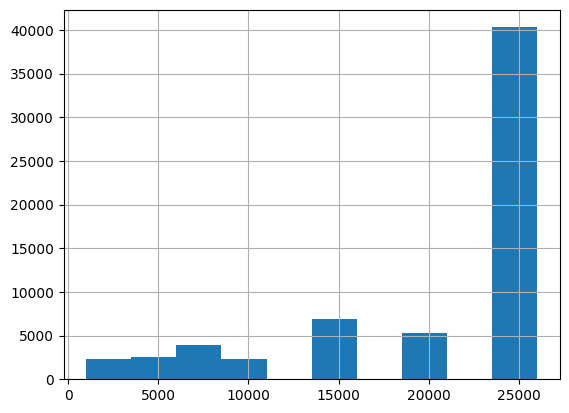

In [ ]:
df['income'].hist() # creating histogram of cleaned income variable

In [ ]:
df.head() #checking head of final data frame

,marital,postlife,age,happy,income,happy_numeric
0,never married,NaN,23.0,not too happy,NaN,0.0
1,married,NaN,70.0,not too happy,NaN,0.0
2,married,NaN,48.0,pretty happy,NaN,5.0
3,married,NaN,27.0,not too happy,NaN,0.0
4,married,NaN,61.0,pretty happy,NaN,5.0


### Exploratory Analysis

For our initial exploratory analysis we wanted to investigate how age, marital status, happiness, and income impact whether one believes in postlife or not.

First, we want to look at distribution of responses for postlife. Then, we want to compare the postlife variable to the other variables we chose to look at.

<Axes: xlabel='postlife', ylabel='Count'>

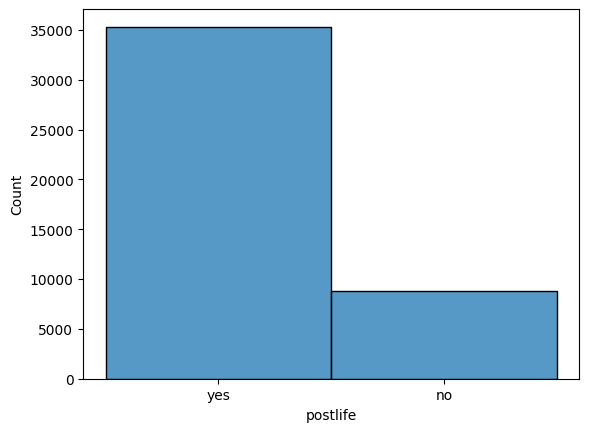

In [ ]:
sns.histplot(df["postlife"]) # create a histogram for postlife variable
#majority of those who answered responded with yes
# could be a sign of response bias - there is a large portion that chose not to answer

In [ ]:
# check if null values are grouped in an interesting way

pd.crosstab(df['postlife'].isnull(), df['marital'].isnull()) # create a cross tabulation to check null values for postlife and martial status variables
# most people responded to the marriage question while fewer responded to postlife

marital,False,True
postlife,,
False,44128,20
True,28211,33


In [ ]:
pd.crosstab(df['postlife'].isnull(), df['happy_numeric']==10) # create a cross tabulation to check null values for postlife and happiness variables
# for all happiness levels, more people answered the postlife question than didn't
# happiness level ==0 has the closest difference between postlife being null vs not null, but unclear if we really care about that

happy_numeric,False,True
postlife,,
False,30381,13767
True,21626,6618


In [ ]:
pd.crosstab(df['postlife'].isnull(), df['income'].isnull())  # create a cross tabulation to check null values for postlife and income variables
# there isn't some set of the population that doesn't answer the postlife question
# seems like null answers for postlife are pretty evently distributed across different categories

income,False,True
postlife,,
False,39947,4201
True,23492,4752


In [ ]:
# look at the number of responses for each variable compared to the postlife variable

print(df["income"].describe(), '\n') # looking at the description for the income variable
print(df["happy_numeric"].describe(), '\n') # looking at the description for the happiness variable
print(df["marital"].describe(), '\n') # looking at the description for the marital variable
print(df["postlife"].describe(), '\n') # looking at the description for the postlife variable
# The number of responses for the postlife variable are significantly less than the number of responses for the other variables.

count    63439.000000
mean     20771.057205
std       7685.238778
min        999.000000
25%      15000.000000
50%      26000.000000
75%      26000.000000
max      26000.000000
Name: income, dtype: float64 

count    67588.000000
mean         5.813384
std          3.217449
min          0.000000
25%          5.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: happy_numeric, dtype: float64 

count       72339
unique          5
top       married
freq        37590
Name: marital, dtype: object 

count     44148
unique        2
top         yes
freq      35337
Name: postlife, dtype: object 



<Axes: xlabel='marital', ylabel='Count'>

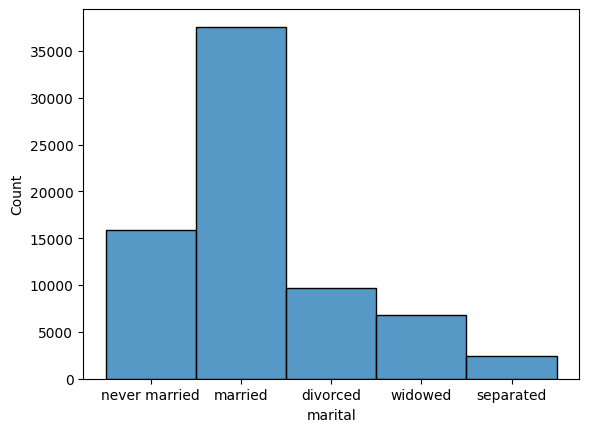

In [ ]:
# look at the marital status variable

sns.histplot(df["marital"]) # create a histogram for the martial status variable
#most people are married

<Axes: xlabel='age', ylabel='Density'>

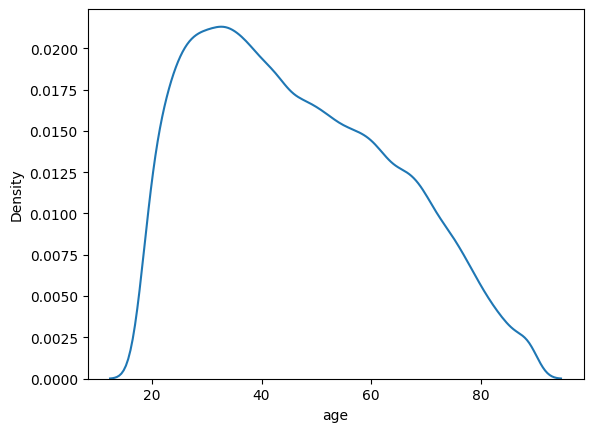

In [ ]:
# look at the age variable

sns.kdeplot(data=df,x="age") # create a kernel density plot for the age variable
#our age data is mostly younger

<Axes: xlabel='age'>

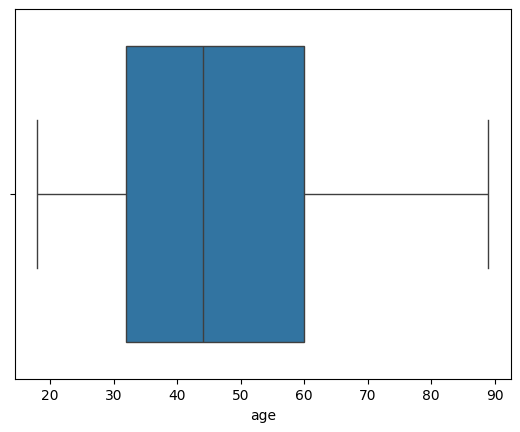

In [ ]:
sns.boxplot(data=df,x="age") # create a boxplot for the age variable
# there are no outliers, and the youngest age is 18

# Results

Our key objective when undertaking this project was to determine the relationships between the variables of 'postlife', 'happy', 'age', 'income', and 'marital status'. We completed this analysis with a variety of visualization methods, including Kernel Density Plots, scatterplots, histograms, as well as grouped comparison tables. In brief, the findings of our study provided correlations with income, age, marital status, and happiness on belief in life after death (postlife). The most fascinating pieces of evidence from our investigation are the plots Figure 1, Figure 2, and Figure 3. The findings from the rest of the investigations of relationships between the variables are also contained in this section.

<Axes: xlabel='income', ylabel='Count'>

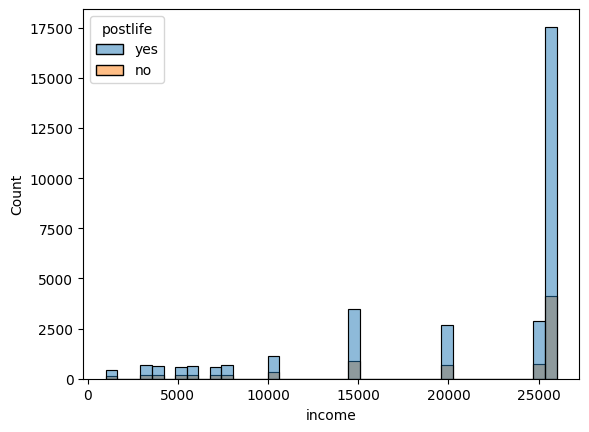

In [ ]:
var = 'income'

sns.histplot(data = df,x="income", hue = 'postlife') # creating a histogram showing the distribution of belief in postlife based on income

# a lot of the data shows income greater than 25000
# of those that have a higher income, significantly more believe in a postlife

<Axes: xlabel='income', ylabel='Density'>

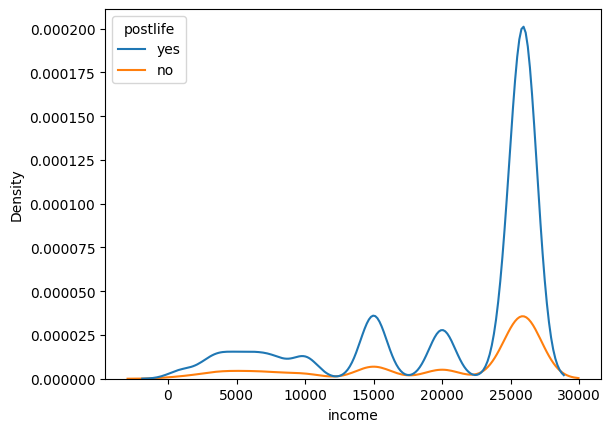

In [ ]:
sns.kdeplot(data = df,x="income", hue = 'postlife') # creating a kernel density plot for income and postlife
# shape of the graphs are very similar, and the greatest differences between the yes and no postlife variable is in the highest income

<Axes: xlabel='age', ylabel='Density'>

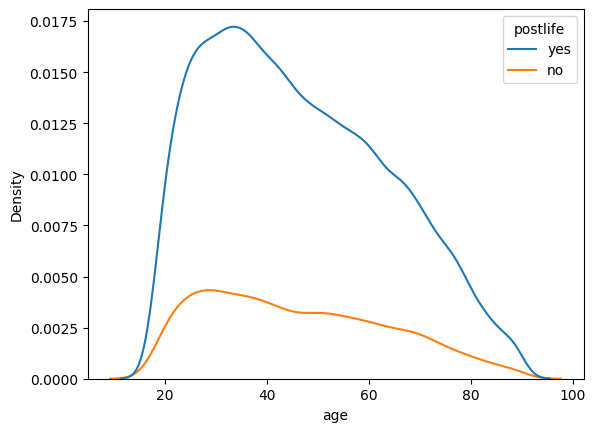

In [ ]:
sns.kdeplot(data = df,x="age", hue = 'postlife') # creating a kernel density plot for age and postlife
# shape of the plots pretty similar

In [ ]:
# grouped descriptions

df.loc[:,['income','age','marital','happy','postlife']].groupby(['marital','happy','postlife']).describe()

income                             \
                                       count          mean          std   
marital       happy         postlife                                      
divorced      not too happy no         247.0  16797.534413  9113.146697   
                            yes        811.0  17855.690506  8884.950570   
              pretty happy  no         666.0  20684.677177  7438.568525   
                            yes       2692.0  20499.614785  7601.033654   
              very happy    no         222.0  20581.067568  7906.168630   
                            yes        868.0  21168.190092  7344.692323   
married       not too happy no         358.0  19812.835196  8159.243015   
                            yes       1119.0  20648.783735  7442.288883   
              pretty happy  no        2155.0  22276.560557  6392.881270   
                            yes       8620.0  22632.362645  6199.373827   
              very happy    no        1390.0  22625.895683  6203.280902   
                            yes       7043.0  22955.270339  5952.527724   
never married not too happy no         380.0  16078.907895  9167.178456   
                            yes       1061.0  17289.298775  9057.568968   
              pretty happy  no        1217.0  19615.423172  8435.472297   
                            yes       4221.0  19768.280265  8169.309396   
              very happy    no         362.0  18759.640884  8802.613306   
                            yes       1524.0  20016.370079  8206.965303   
separated     not too happy no          96.0  14416.614583  9144.148261   
                            yes        267.0  15498.074906  9385.470098   
              pretty happy  no         195.0  17046.128205  8823.219449   
                            yes        589.0  17865.840407  8776.619250   
              very happy    no          43.0  17813.906977  9251.227571   
                            yes        173.0  18456.624277  8708.143914   
widowed       not too happy no         144.0  15090.236111  8688.065715   
                            yes        505.0  14942.546535  8891.511586   
              pretty happy  no         351.0  16817.658120  8664.277030   
                            yes       1616.0  16264.839728  8842.804132   
              very happy    no         125.0  16567.992000  8942.785494   
                            yes        669.0  16458.881913  8888.393742   

                                                                        \
                                        min      25%      50%      75%   
marital       happy         postlife                                     
divorced      not too happy no        999.0   7000.0  20000.0  26000.0   
                            yes       999.0  10000.0  20000.0  26000.0   
              pretty happy  no        999.0  15000.0  26000.0  26000.0   
                            yes       999.0  15000.0  25000.0  26000.0   
              very happy    no        999.0  15000.0  26000.0  26000.0   
                            yes       999.0  15000.0  26000.0  26000.0   
married       not too happy no        999.0  15000.0  25000.0  26000.0   
                            yes       999.0  15000.0  26000.0  26000.0   
              pretty happy  no        999.0  20000.0  26000.0  26000.0   
                            yes       999.0  20000.0  26000.0  26000.0   
              very happy    no        999.0  20000.0  26000.0  26000.0   
                            yes       999.0  25000.0  26000.0  26000.0   
never married not too happy no        999.0   7000.0  15000.0  26000.0   
                            yes       999.0   8000.0  20000.0  26000.0   
              pretty happy  no        999.0  15000.0  25000.0  26000.0   
                            yes       999.0  15000.0  25000.0  26000.0   
              very happy    no        999.0  10000.0  25000.0  26000.0   
                            yes       999.0  15000.0  26000.0  26000.0   
separate

In [ ]:
df.loc[:,['age','postlife']].groupby(['postlife']).describe() # creating a grouped description for age by belief in postlife

# the mean ages for yes and no for postlife are very close together, suggesting no real difference in beliefs based on age
# this is supported by the kde plot

age                                                    
            count       mean        std   min   25%   50%   75%   max
postlife                                                             
no         8779.0  46.048867  17.838259  18.0  31.0  44.0  60.0  89.0
yes       35136.0  46.349243  17.488356  18.0  32.0  44.0  59.0  89.0

In [ ]:
df.loc[:,['income','postlife']].groupby(['postlife']).describe() # creating a grouped description for income by belief in postlife
# overall income is $600 higher for those who do believe in postlife vs those who don't


income                                                      \
            count          mean          std    min      25%      50%   
postlife                                                                
no         7997.0  20287.093285  7933.102904  999.0  15000.0  26000.0   
yes       31950.0  20848.030016  7626.358460  999.0  15000.0  26000.0   

                            
              75%      max  
postlife                    
no        26000.0  26000.0  
yes       26000.0  26000.0

In [ ]:
df.loc[:,['income','marital','postlife']].groupby(['marital','postlife']).describe() # creating a grouped description for income by belief in postlife and marital status

#the highest mean income belongs to thoses who are married and believe in a postlife
#there could be a missing data issue because most people are married and the greatest bucket of income was 25000+

income                                             \
                          count          mean          std    min      25%   
marital       postlife                                                       
divorced      no         1144.0  19732.502622  8117.401206  999.0  15000.0   
              yes        4400.0  20132.480909  7889.711574  999.0  15000.0   
married       no         3912.0  22175.863497  6551.956535  999.0  20000.0   
              yes       16834.0  22633.831769  6213.628227  999.0  20000.0   
never married no         1983.0  18778.590519  8746.911495  999.0  10000.0   
              yes        6856.0  19421.936989  8378.427553  999.0  15000.0   
separated     no          335.0  16361.158209  9036.463758  999.0   7000.0   
              yes        1041.0  17329.453410  9003.485349  999.0   8000.0   
widowed       no          621.0  16352.642512  8740.528927  999.0   8000.0   
              yes        2810.0  16055.145196  8878.029467  999.0   7000.0   

                                                   
                            50%      75%      max  
marital       postlife                             
divorced      no        25000.0  26000.0  26000.0  
              yes       25000.0  26000.0  26000.0  
married       no        26000.0  26000.0  26000.0  
              yes       26000.0  26000.0  26000.0  
never married no        25000.0  26000.0  26000.0  
              yes       25000.0  26000.0  26000.0  
separated     no        15000.0  26000.0  26000.0  
              yes       20000.0  26000.0  26000.0  
widowed       no        15000.0  26000.0  26000.0  
              yes       15000.0  26000.0  26000.0

In [ ]:
df.loc[:,['income','happy_numeric','postlife']].groupby(['postlife']).describe()
# i don't know if this shows any helpful information, maybe we don't need it?

income                                                      \
            count          mean          std    min      25%      50%   
postlife                                                                
no         7997.0  20287.093285  7933.102904  999.0  15000.0  26000.0   
yes       31950.0  20848.030016  7626.358460  999.0  15000.0  26000.0   

                           happy_numeric                                     \
              75%      max         count      mean       std  min  25%  50%   
postlife                                                                      
no        26000.0  26000.0        8752.0  5.582724  3.213681  0.0  5.0  5.0   
yes       26000.0  26000.0       35128.0  6.020269  3.173347  0.0  5.0  5.0   

                      
           75%   max  
postlife              
no        10.0  10.0  
yes       10.0  10.0

In [ ]:
df.loc[:,['happy_numeric','postlife']].groupby(['postlife']).describe() # creating a grouped description for happiness level by belief in postlife
# happiness level for those who believe in a postlife is .04 points above those who do not
# that doesn't appear to be that large of a difference

happy_numeric                                               
                 count      mean       std  min  25%  50%   75%   max
postlife                                                             
no              8752.0  5.582724  3.213681  0.0  5.0  5.0  10.0  10.0
yes            35128.0  6.020269  3.173347  0.0  5.0  5.0  10.0  10.0

<Axes: xlabel='happy_numeric', ylabel='income'>

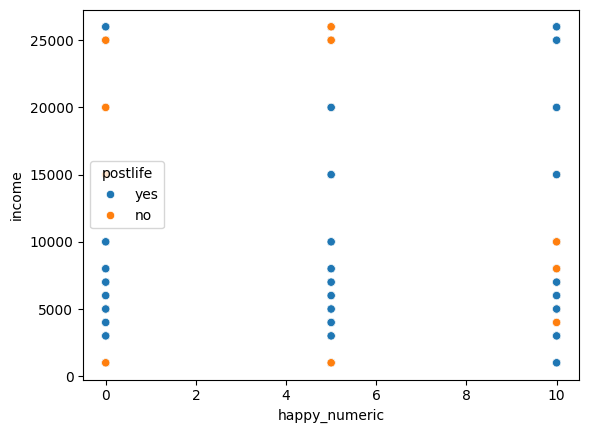

In [ ]:
sns.scatterplot(data=df,x="happy_numeric",y="income", hue = "postlife") # creating a scatterplot for income and happiness, colored by belief in postlife
# looks slightly like the more happy and more money you make, the more likely you are to say you believe in a postlife

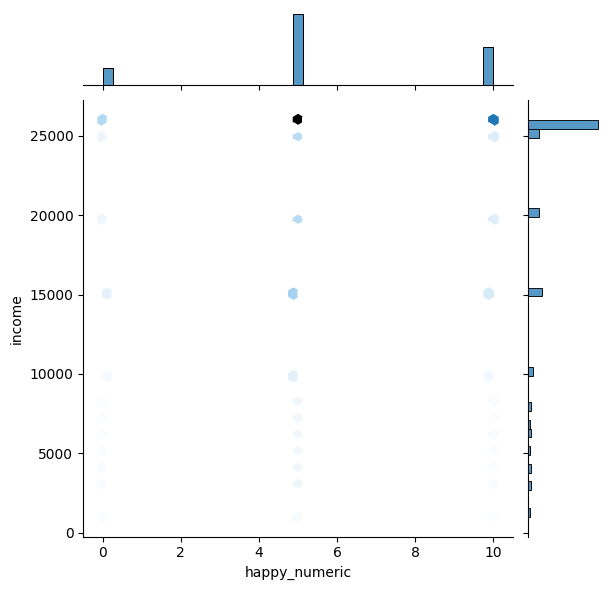

In [ ]:
sns.jointplot(x='happy_numeric',y='income',data=df,kind='hex') # creating a jointplot for age by belief in postlife
# the highest concentration of data is high income, pretty happy and high income very happy
# there is also a higher concentration of lower happiness level around 15000 income

In [ ]:
#there is a slight positive correlation between income and happiness level

cor = df.corr()
print(cor) # displaying the correlation between the numeric values in the dataset

                    age    income  happy_numeric
age            1.000000 -0.040019       0.017426
income        -0.040019  1.000000       0.126902
happy_numeric  0.017426  0.126902       1.000000


<ipython-input-59-f5a8b797340a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


[Text(0.5, 1.0, 'Figure 1')]

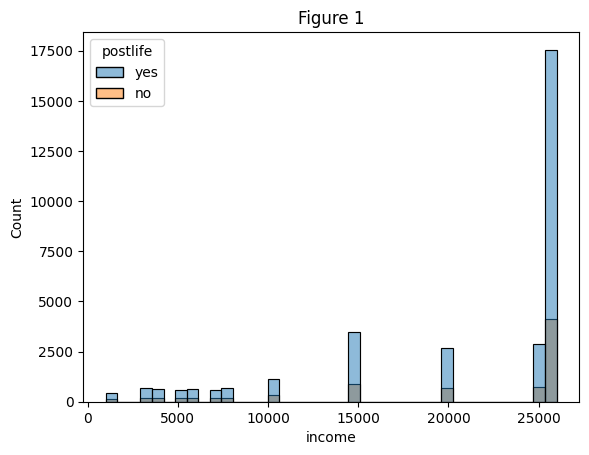

In [ ]:
var = 'income'

sns.histplot(data = df,x="income", hue = 'postlife').set(title='Figure 1') # creating a histogram showing the distribution of belief in postlife based on income

The histogram featured above (Figure 1) demonstrates a trend in the data that those in the higher income bracket of 25,000 dollars are both the most common bracket from the GSS and have the highest ratio of those that believe in life after death. There is something to be said about the odd range of incomes that were reported in the General Social Survey, as most households in the United States earn more than 25,000 dollars annually. Additionally, the bracket for those that earn over 25,000 dollars per year had more responses than any of the other income ranges (almost 35,000), which is why it had a higher count of 'yes' for 'postlife' than others. Note: the gray sections are orange, but have been covered by the blue bars, resulting in that gray color.

[Text(0.5, 1.0, 'Figure 2')]

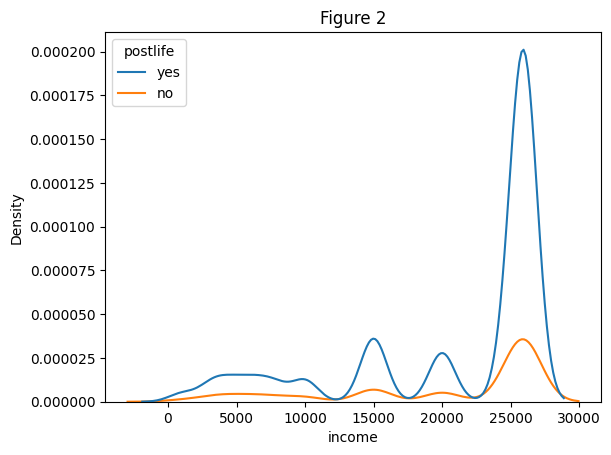

In [ ]:
sns.kdeplot(data = df,x="income", hue = 'postlife').set(title='Figure 2')

Figure 2 demonstrates another way of portraying the analysis in Figure 1 that is easier to visualize. The Kernel Density Plot is more pleasing to the eye, especially when trying to show the disparity between the amount of responses that the high income bracket had compared to all the others, as well as the ratios between 'yes' and 'no' responses to the 'postlife' question.

[Text(0.5, 1.0, 'Figure 3')]

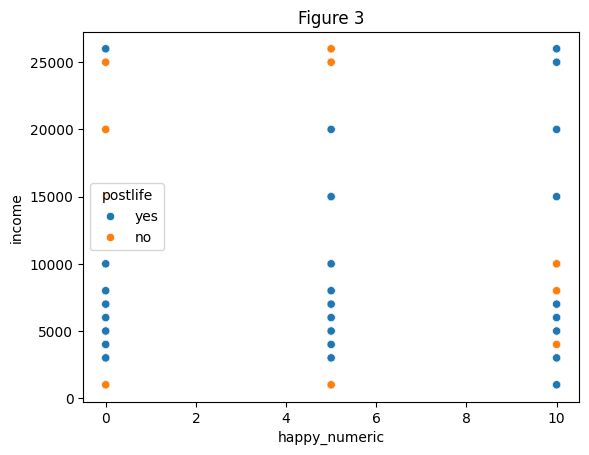

In [ ]:
sns.scatterplot(data=df,x="happy_numeric",y="income", hue = "postlife").set(title='Figure 3')

Figure 3 uses a scatterplot to compare the values for 'happy' (coerced to numeric) with 'income', and 'postlife' is the hue. As provided in the key, orange represents no and blue represents yes. By looking at this plot, it appears that the majority of respondents believe in life after death regardless of income or happiness. It is unclear if this overarching belief in life after death is rooted in a specific religion or type of spirituality across the responses. Perhaps including a variable regarding religion would have been a compelling direction we could have investigated in this project.

Through our analyses, we found that despite age, income, marital status, or happiness, the majority of respondents in the GSS believe in life after death, as can be seen in the various plots and tables in this section.

# Conclusion
For this project, we tried to find how the interaction of age, marital status, happiness, and income level variables affect individuals' beliefs in life after death. As we are conducting this project, we used various exploratory visual analysis like histogram, kernel density plot, and scatter plot. After creating these visualizations, we found that there are various interesting relationships between these variables. First of all, the higher the income gets, the more people believe in life after death. Also, the happier you are, it is more likely to say that you believe in life after death. And, these three variables (income, happiness, and belief in post-life) might be correlated with each other as we drew a conclusion based on the scatter plot we created that there is a slight positive correlation between happiness and income level. In terms of marital status, income, and post-life beliefs, the result shows that people with high income are married and believe in post-life.

Although we found that the greatest mean, when looking at marital status, income, and post-life variables relationship, comes from people with high income who are married believe in post-life, this might suffer from missing data problems as most people in the data set are married with 25,000+ income. However, there is a chance that people who have higher income than 25,000, which is not captured in this data, might have different responses to the post-life question. Furthermore, as mentioned above, most households in the United States earn about $25,000 per year. In order to mitigate this issue, we clearly stated how we cleaned and prepared for the data to identify the missing data. Nonetheless, in order to address this problem in the future, we could gather more data that includes a broader range of income data to determine whether the result from this analysis would change or not.

Just like how we could gather more data in the future, in order to further develop this analysis outside the scope of this project, we could incorporate a wide range of data not only from the General Social Survey but also from other sources such as Census. If we were to do this, we could have drawn different results or more accurate results. Additonally, we could have data from not only individuals from the United States but also individuals from all around the wrold to expand this research more.

Overall, we found some very interesting results that interactions between age, marital status, happiness, and income influence beliefs in life after death.
